#Training a CNN based Image Classifier

1. Load and normalize the dataset.
2. Model the CNN
3. Compute the loss
4. Update the parameters using backprop and an optimizer
5. Train on training data
6. Test on testing data

In [ ]:
1. Loading the data using torchvision to get CIFAR-10 dataset)

In [20]:
import numpy as np
import matplotlib.pyplot as plt


import torchvision
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [50]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)

trainloader = torch.utils.data.DataLoader(trainset, batch_size = 32, shuffle=True, num_workers=2) 

testset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)

testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [7]:
def imshow(img):
    img = img/2 +0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))

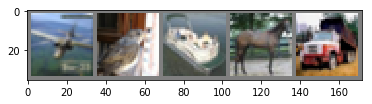

In [10]:
dataiterator = iter(trainloader)
images , labels = dataiterator.next()

imshow(torchvision.utils.make_grid(images))


2.  Define your Network

In [58]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,8,5)
        self.pool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(8,16,5)
        
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120,80)
        self.fc3 = nn.Linear(80,10)
    
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        #print(len(x))
        x = F.relu(self.fc2(x))
        #print(len(x))
        x = self.fc3(x)
        return x

net = Net()

3. Define Loss and Optimizer

In [59]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.0001, momentum=0.9)

4. Training

In [ ]:
print('==========================Starting Training==========================')
for epoch in range(3): # epochs
    
    running_loss = 0.0
    for i, data in enumerate(trainloader,0):
        images , labels = data
        
        optimizer.zero_grad()
        
        outs = net(images)
        #print(len(outs), len(labels))
        loss= criterion(outs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 50 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0
print('==========================Training Finished==========================')

Predicted:   frog truck truck  deer


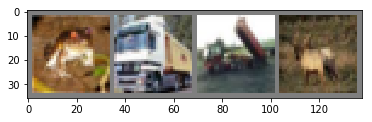

In [55]:
testiter = iter(testloader)
images, labels = testiter.next()
imshow(torchvision.utils.make_grid(images))
out = net(images)
_,predicted = torch.max(out, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [57]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net.Forward(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 61 %
